# IMDB Names dataset embedding


## install libs

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.9 MB/s eta 0:00:00


In [2]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=2e7971800e412dafbbd4c0099807ff49c828536a53a913fd60cb5b441d6d6754
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [3]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82813 sha256=d92b802c0a70f2518c8ac7f9c10e4538cf0b2fd6ae2c85c1268d6c1cd42f309c
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55621 sha256=3aa71179f63cf2666da7528c9ba7b6e252c6f811d20269b82534eb8c241f51f6
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [4]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199772 sha256=ef4abd4d84fe79fd677af19bce9721bdd6360d7d1a17d8ef0b08d4405c689999
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [5]:
!pip install huggingface_hub

## install and test model

In [6]:
import fasttext
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(repo_id="facebook/fasttext-en-vectors", filename="model.bin")
model = fasttext.load_model(model_path)
model.words


len(model.words)


model['bread']


array([ 1.66560188e-02,  4.83326837e-02, -4.07977439e-02,  7.29793161e-02,
       -9.07280296e-03,  1.27149627e-01,  1.31222531e-01,  3.06046270e-02,
       -3.34123448e-02,  8.24084282e-02, -6.39760047e-02,  1.12891551e-02,
        9.14333984e-02,  2.33892687e-02,  5.14939502e-02,  1.04815707e-01,
        1.08066220e-02,  1.06133692e-01,  3.46985906e-02, -4.42300104e-02,
       -4.35786769e-02,  9.25996751e-02, -9.69411805e-02, -1.44355586e-02,
        1.21351797e-02, -1.10497966e-01,  1.03149407e-01, -9.01999250e-02,
        1.23140305e-01,  1.64086506e-01,  3.23432237e-02,  2.00566024e-01,
        1.51708782e-01,  2.42252685e-02, -6.99371025e-02,  9.23830718e-02,
       -2.70268824e-02,  8.17851350e-02, -1.53318346e-01, -1.55680507e-01,
       -3.22322324e-02,  6.29726425e-02,  8.55547488e-02,  4.02307510e-02,
       -1.69549733e-01,  3.27703357e-02, -4.56138700e-02,  9.41093266e-03,
        4.92844284e-02,  1.47414515e-02, -2.30129287e-02, -2.45344378e-02,
       -4.94667254e-02, -

## Import dataset

In [7]:
import pandas as pd
import requests
import gzip
import shutil

# IMDb names dataset URL
names_url = "https://datasets.imdbws.com/name.basics.tsv.gz"
file_name = "name.basics.tsv.gz"

# Download the dataset
response = requests.get(names_url, stream=True)
with open(file_name, "wb") as file:
    shutil.copyfileobj(response.raw, file)

# Extract the dataset
!gzip -d $file_name --force

# Load the tsv file into a pandas DataFrame
df = pd.read_csv(file_name.replace(".gz", ""), sep='\t')

# Display the first few rows of the DataFrame
print(df.head())


      nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                     primaryProfession  \
0       soundtrack,actor,miscellaneous   
1                   actress,soundtrack   
2  actress,soundtrack,music_department   
3              actor,soundtrack,writer   
4                writer,director,actor   

                            knownForTitles  
0  tt0053137,tt0045537,tt0050419,tt0072308  
1  tt0117057,tt0075213,tt0038355,tt0037382  
2  tt0056404,tt0054452,tt0049189,tt0057345  
3  tt0072562,tt0080455,tt0078723,tt0077975  
4  tt0083922,tt0050976,tt0069467,tt0050986  


In [8]:
df

nconst         primaryName birthYear deathYear  \
0         nm0000001        Fred Astaire      1899      1987   
1         nm0000002       Lauren Bacall      1924      2014   
2         nm0000003     Brigitte Bardot      1934        \N   
3         nm0000004        John Belushi      1949      1982   
4         nm0000005      Ingmar Bergman      1918      2007   
...             ...                 ...       ...       ...   
12743168  nm9993714   Romeo del Rosario        \N        \N   
12743169  nm9993716       Essias Loberg        \N        \N   
12743170  nm9993717  Harikrishnan Rajan        \N        \N   
12743171  nm9993718         Aayush Nair        \N        \N   
12743172  nm9993719          Andre Hill        \N        \N   

                            primaryProfession  \
0              soundtrack,actor,miscellaneous   
1                          actress,soundtrack   
2         actress,soundtrack,music_department   
3                     actor,soundtrack,writer   
4                       writer,director,actor   
...                                       ...   
12743168  animation_department,art_department   
12743169                                  NaN   
12743170                      cinematographer   
12743171                      cinematographer   
12743172                                  NaN   

                                   knownForTitles  
0         tt0053137,tt0045537,tt0050419,tt0072308  
1         tt0117057,tt0075213,tt0038355,tt0037382  
2         tt0056404,tt0054452,tt0049189,tt0057345  
3         tt0072562,tt0080455,tt0078723,tt0077975  
4         tt0083922,tt0050976,tt0069467,tt0050986  
...                                           ...  
12743168          tt14069590,tt2455546,tt11657662  
12743169                                       \N  
12743170                                tt8736744  
12743171                                tt8736744  
12743172                                       \N  

[12743173 rows x 6 columns]

In [9]:
df_base = df.copy(deep=True)

## compute embeddings

Lets take a 1M sample.

In [10]:
df = df_base.sample(n=10000)

In [11]:
df.head()

nconst            primaryName birthYear deathYear  \
6317037    nm2224849  Konstantin Kamyshanov      1975      2011   
10038910   nm6579237               Commedus        \N        \N   
1454492   nm10573134           Satyan Patel        \N        \N   
9101637    nm5390423        Takako Miyauchi        \N        \N   
8527291    nm4742271           Reed Apagian        \N        \N   

                          primaryProfession  \
6317037   camera_department,director,writer   
10038910                                NaN   
1454492           transportation_department   
9101637                            producer   
8527291                                 NaN   

                                   knownForTitles  
6317037   tt0386693,tt1745801,tt0478737,tt1735198  
10038910                                       \N  
1454492                       tt3319730,tt5254610  
9101637                      tt12490694,tt2371434  
8527291                                        \N

In [12]:
len(df)

10000

## option: keep family name only

And backup `primaryName` to `completeName`.

In [13]:
df['completeName'] = df['primaryName']
df['primaryName'] = df['primaryName'].str.split(' ').str.get(1)

In [14]:
from tqdm import tqdm
import numpy as np


In [15]:
batch_size = 1
embeddings_list = []
for i in tqdm(range(0, len(df.primaryName.values), batch_size), desc="Processing batches"):
    batch = df.primaryName.astype(str).values[i:i+batch_size]

    embeddings_list.append(model[batch[0]])

# Concatenate all the batches
# final_embeddings = np.concatenate(embeddings_list, axis=0)
# print(final_embeddings.shape)
embeddings = embeddings_list

Processing batches: 100%|██████████| 10000/10000 [00:05<00:00, 1698.71it/s]


In [16]:
len(embeddings_list)

10000

In [17]:
embeddings

[array([ 3.34640555e-02, -4.95165810e-02, -1.65783502e-02, -3.06113437e-03,
         4.72173505e-02, -2.73810737e-02,  8.24546441e-03, -3.92951146e-02,
        -3.81918699e-02, -4.09083776e-02, -2.17232239e-02, -5.95805934e-04,
         4.14884314e-02, -5.30664530e-03,  1.53968055e-02, -1.20133340e-01,
         1.09461565e-02, -2.02094000e-02,  1.39950961e-03,  1.38641810e-02,
         3.94980609e-02, -6.41115606e-02,  3.87632172e-03,  2.42683031e-02,
         1.46035030e-02, -2.52575837e-02, -4.62632217e-02, -3.10631236e-03,
         1.36124287e-02, -3.19985673e-03, -1.03149246e-02, -4.44670441e-03,
        -6.35585096e-03,  5.39162336e-03,  2.71443501e-02,  5.31462952e-02,
         6.43386990e-02,  1.09270342e-01, -1.64057463e-02,  1.33567555e-02,
         7.64340907e-03,  1.05539076e-02, -2.82832086e-02,  2.79374178e-02,
         1.01428986e-01,  2.97030807e-02, -1.85887031e-02,  1.22509757e-02,
         1.38114793e-02,  1.33823743e-02,  9.06661153e-03,  4.16009352e-02,
        -9.6

In [18]:
# embeddings = model.encode(df.primaryName.values, show_progress_bar=True)

In [19]:
# embeddings.shape

## PCA

It is fast but explained variance for 10 dimensions is 0.035, which is too low to represent the underlying 384 dimensions.


In [20]:
# embeddings

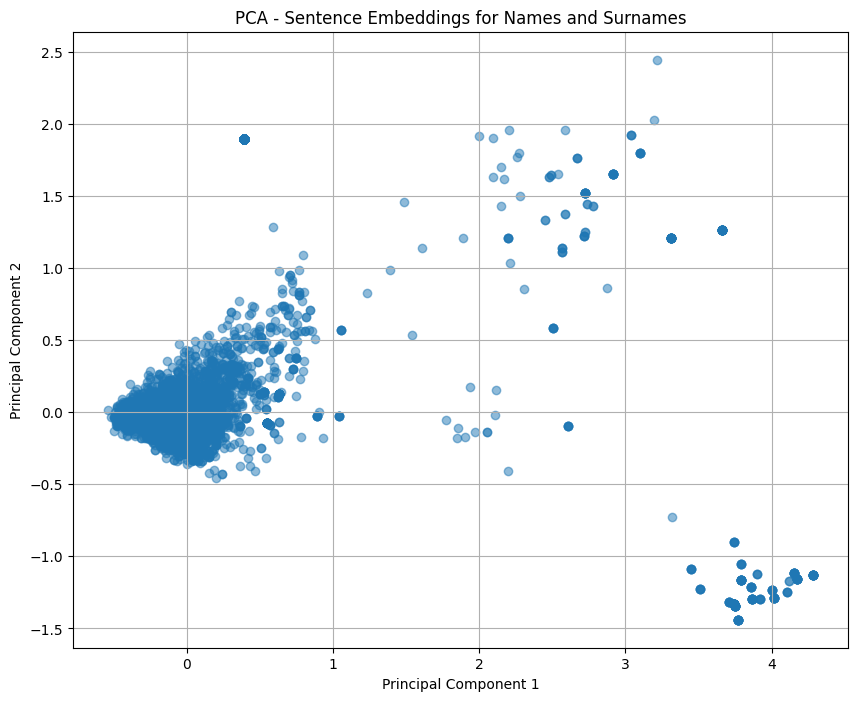

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

# Perform PCA
pca = PCA(n_components=2)  # Set n_components to the desired number of dimensions (e.g., 2 for 2D visualization)
reduced_embeddings = pca.fit_transform(embeddings)

# Convert the reduced embeddings to a DataFrame for visualization
df_reduced = pd.DataFrame(reduced_embeddings, columns=['Component 1', 'Component 2'])

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_reduced['Component 1'], df_reduced['Component 2'], alpha=0.5)
plt.title('PCA - Sentence Embeddings for Names and Surnames')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [22]:
import numpy as np
import pandas as pd
# from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

explained_var_ratios = []
for n_components in range(2, 11):
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    explained_var_ratios.append(np.sum(pca.explained_variance_ratio_))

# Print the explained variance ratios for each dimension from 2D to 10D
for n, explained_var_ratio in enumerate(explained_var_ratios, start=2):
    print(f"Explained Variance Ratio for {n}D: {explained_var_ratio:.4f}")


Explained Variance Ratio for 2D: 0.3076
Explained Variance Ratio for 3D: 0.3578
Explained Variance Ratio for 4D: 0.3927
Explained Variance Ratio for 5D: 0.4149
Explained Variance Ratio for 6D: 0.4335
Explained Variance Ratio for 7D: 0.4499
Explained Variance Ratio for 8D: 0.4635
Explained Variance Ratio for 9D: 0.4763
Explained Variance Ratio for 10D: 0.4876


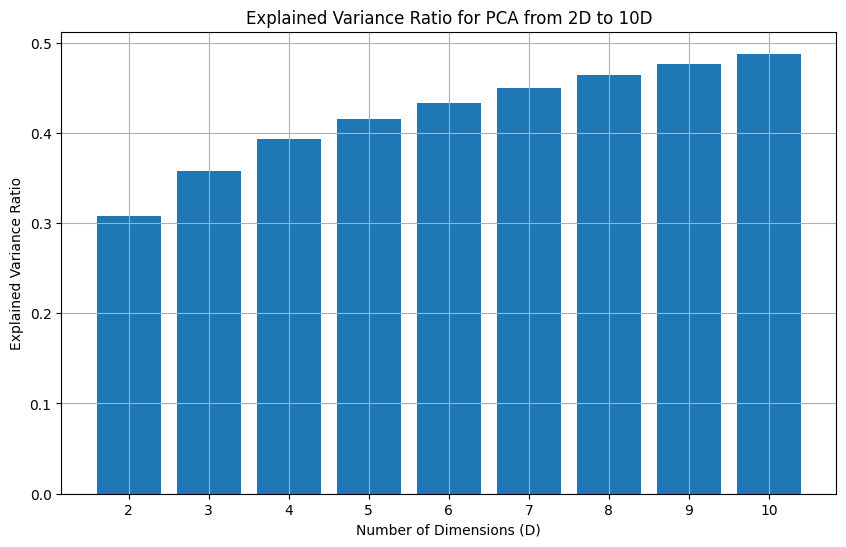

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

explained_var_ratios = []
for n_components in range(2, 11):
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    explained_var_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratios in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(2, 11), explained_var_ratios)
plt.xlabel('Number of Dimensions (D)')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for PCA from 2D to 10D')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


## UMAP

We find out that umap make a large blob. Not useful.

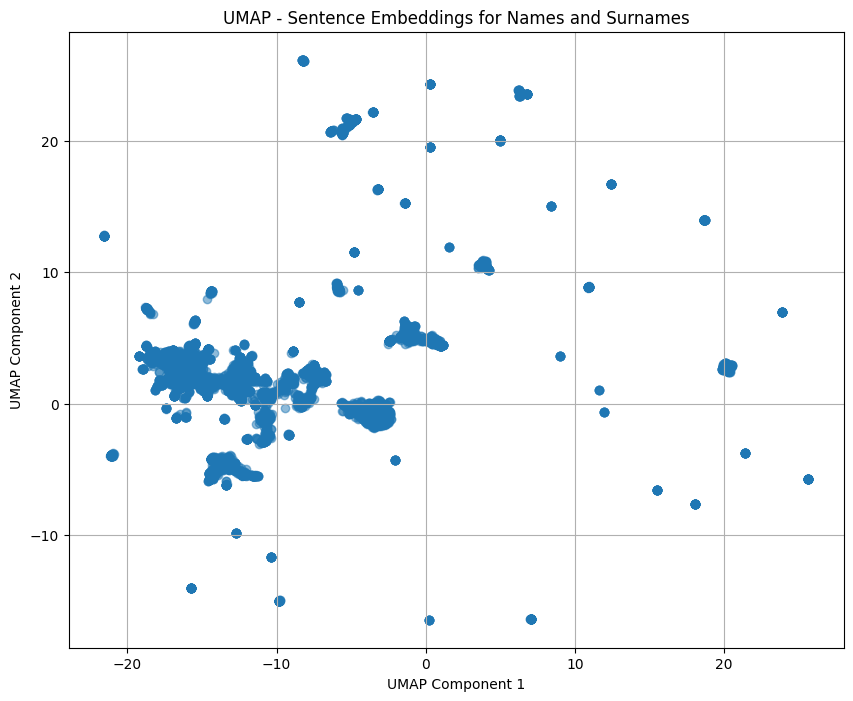

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sentence_transformers import SentenceTransformer
import umap

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

# Perform UMAP
umap_model = umap.UMAP(n_components=2)  # Set n_components to the desired number of dimensions (e.g., 2 for 2D visualization)
reduced_embeddings = umap_model.fit_transform(embeddings)

# Convert the reduced embeddings to a DataFrame for visualization
df_reduced = pd.DataFrame(reduced_embeddings, columns=['UMAP Component 1', 'UMAP Component 2'])

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_reduced['UMAP Component 1'], df_reduced['UMAP Component 2'], alpha=0.5)
plt.title('UMAP - Sentence Embeddings for Names and Surnames')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()


In [25]:
df_reduced

UMAP Component 1  UMAP Component 2
0            -3.151149         -0.019642
1            20.454937          2.936271
2            -2.084955         -4.291520
3             3.672468         10.524814
4            -4.513753         -0.495477
...                ...               ...
9995        -12.805190          4.109917
9996        -15.571248          6.056828
9997        -14.385773          8.488885
9998         -4.952516         21.450624
9999         -2.844614         -0.668957

[10000 rows x 2 columns]

In [26]:
df_reduced

UMAP Component 1  UMAP Component 2
0            -3.151149         -0.019642
1            20.454937          2.936271
2            -2.084955         -4.291520
3             3.672468         10.524814
4            -4.513753         -0.495477
...                ...               ...
9995        -12.805190          4.109917
9996        -15.571248          6.056828
9997        -14.385773          8.488885
9998         -4.952516         21.450624
9999         -2.844614         -0.668957

[10000 rows x 2 columns]

## Export UMAP dataset

In [27]:
df.reset_index(drop=True, inplace=True)

In [28]:
df_to_export = pd.merge(df, df_reduced, left_index=True, right_index=True)

In [29]:
df_to_export.to_csv('dimensions_ummap_v4.csv')

In [30]:
import numpy as np
np_embeddings = np.array(embeddings)

## TSNE

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

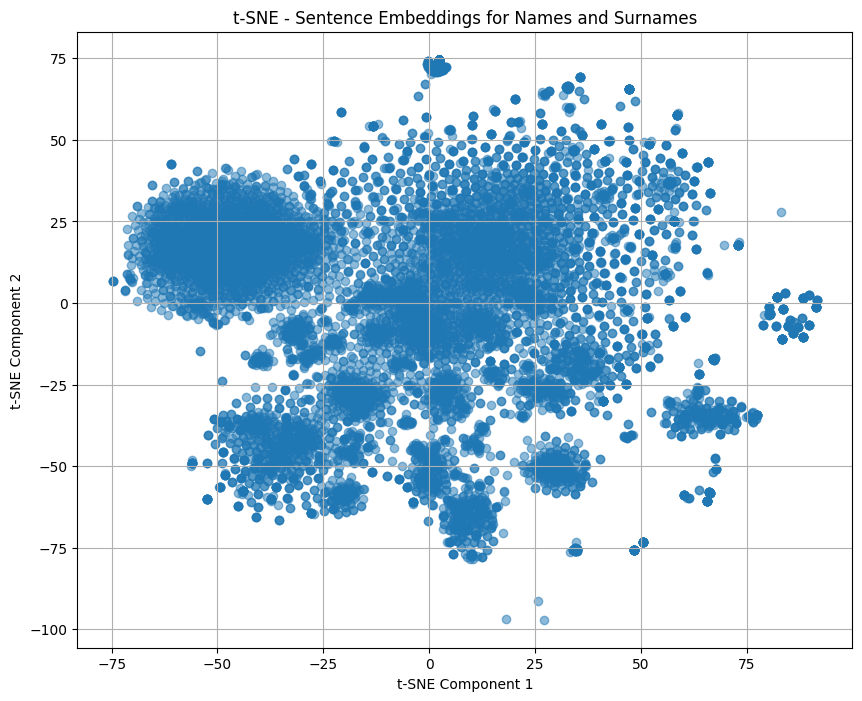

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

# Perform t-SNE
tsne_model = TSNE(n_components=2, random_state=42)  # Set n_components to the desired number of dimensions (e.g., 2 for 2D visualization)
reduced_embeddings = tsne_model.fit_transform(np_embeddings)

# Convert the reduced embeddings to a DataFrame for visualization
df_reduced = pd.DataFrame(reduced_embeddings, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_reduced['t-SNE Component 1'], df_reduced['t-SNE Component 2'], alpha=0.5)
plt.title('t-SNE - Sentence Embeddings for Names and Surnames')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


In [32]:
df_to_export = pd.merge(df, df_reduced, left_index=True, right_index=True)
df_to_export.to_csv('dimensions_tsne_v4.csv')